### Очистка и подготовка данных

Данные не всегда представляют собой идеально организованный набор наблюдений без каких-либо пропусков или аномалий Обычно данные содержат в себе кучу мусора, который необходимо почистить, да и вообще сами данные порой лучше воспринимать критически, для того чтобы затем привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.



Источники недостающих ценностей

Прежде чем мы углубимся в код, важно понять источники недостающих данных. Вот несколько типичных причин отсутствия данных:
<ol>
    <li> Пользователь забыл заполнить поле.</li>

<li> Данные были потеряны при переносе вручную из устаревшей базы данных.</li>

<li> Произошла ошибка программирования.</li>

<li> Пользователи решили не заполнять поле, связанное с их мнением о том, как результаты будут использоваться или интерпретироваться.</li>
</ol>

### 2 главные проблемы при подготовке данных: пропущенные значения и неправильная типизация


In [2]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()
#показывает в том числе сколько пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Очистка данных порой предполагает избавление от неиспользуемых сущностей/столбцов

In [ ]:
# Удаляем столбцы, в которых нет ценной для нас информации
df.drop(['Ticket', 'Cabin'], axis = 1, inplace=True)

In [ ]:
df.head()

PassengerId  Survived  Pclass  ... Parch     Fare  Embarked
0            1         0       3  ...     0   7.2500         S
1            2         1       1  ...     0  71.2833         C
2            3         1       3  ...     0   7.9250         S
3            4         1       1  ...     0  53.1000         S
4            5         0       3  ...     0   8.0500         S

[5 rows x 10 columns]

In [ ]:
# Округляем стоимость билета до двух знаков после запятой
df.Fare = round(df.Fare, 2)


 Посчитаем пропущенные значения

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Nan = not a number 

### Пропущенные значения можно удалить, но скорее так делать не следует

In [ ]:
df.dropna(subset=['Age'])
df
#можно настраивать и изменять способ удаления данных, например с помощью параметра thresh=2, который оставит строки с боллее чем 2 непустыми значениями

PassengerId  Survived  Pclass  ... Parch     Fare  Embarked
0              1         0       3  ...     0   7.2500         S
1              2         1       1  ...     0  71.2833         C
2              3         1       3  ...     0   7.9250         S
3              4         1       1  ...     0  53.1000         S
4              5         0       3  ...     0   8.0500         S
..           ...       ...     ...  ...   ...      ...       ...
886          887         0       2  ...     0  13.0000         S
887          888         1       1  ...     0  30.0000         S
888          889         0       3  ...     2  23.4500         S
889          890         1       1  ...     0  30.0000         C
890          891         0       3  ...     0   7.7500         Q

[891 rows x 10 columns]

### Пропущенные значения можно заменять на что-то другое

In [ ]:
#Способ 1: Константа 

df['Age'].fillna(25)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

29.69911764705882

In [ ]:
# Способ 2: медиана
print(df['Age'].median())
df['Age'].fillna(df['Age'].median())

28.0


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df[df['Survived']==0]['Age'].mean()

30.62617924528302

In [ ]:
df[df['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [ ]:
# Способ 2: Cредние арифметические в зависимости от класса каюты
age_1 = df[df['Pclass'] == 1]['Age'].mean()
age_2 = df[df['Pclass'] == 2]['Age'].mean()
age_3 = df[df['Pclass'] == 3]['Age'].mean()

In [ ]:
def fill_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return age_1
        
        if row['Pclass'] == 2:
            return age_2
        
        if row['Pclass'] == 3:
            return age_3
        
    return row['Age']

In [ ]:
df.apply(fill_age, axis=1)

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Length: 891, dtype: float64

https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.DataFrame.interpolate.html

https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

In [ ]:
df.groupby('Pclass')['Age'].apply(lambda x:x.fillna(x.mean()))

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

На всякий случай проверяем равны ли полученные объекты

In [ ]:
(df.apply(fill_age, axis = 1)).equals(df.groupby('Pclass')['Age'].apply(lambda x:x.fillna(x.mean())))

True

In [ ]:
df.groupby('Pclass')['Age'].apply(lambda x:x.fillna(x.mean()))

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

In [ ]:
df.groupby('Pclass')['Age'].apply(lambda x:x.fillna(x.mean()))

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

Принцип действия **groupby**
![](https://i.stack.imgur.com/sgCn1.jpg)

- Разделение данных по группам по определенному критерию

- Применение к каждой группе определенной функции

- Сложение результатов в единую структуру

PassengerId  Survived  Pclass  ... Parch     Fare  Embarked
0            1         0       3  ...     0   7.2500         S
1            2         1       1  ...     0  71.2833         C
2            3         1       3  ...     0   7.9250         S
3            4         1       1  ...     0  53.1000         S
4            5         0       3  ...     0   8.0500         S

[5 rows x 10 columns]

In [ ]:
df.groupby(['Sex'])['Fare'].mean() 

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

### Создаем новый столбец с информацией о том, был ли пассажир на борту один или с родственниками
Столбец должен содержать значение "alone", если он был на борту один (без супруга/супруги, братьев, сестер, детей и родителей) и значение "not alone", если пассажир путешествовал с кем-то из родственников

sibsp Number of Siblings/Spouses Aboard

parch Number of Parents/Children Aboard 

In [ ]:
# Способ 1: с помощью именной функции и apply
def alone_check(row):
    if row['SibSp'] or row['Parch']:
        return 'not alone'
    return 'alone'
    
df['Alone'] = df.apply(alone_check, axis=1)
df

PassengerId  Survived  Pclass  ...     Fare Embarked      Alone
0              1         0       3  ...   7.2500        S  not alone
1              2         1       1  ...  71.2833        C  not alone
2              3         1       3  ...   7.9250        S      alone
3              4         1       1  ...  53.1000        S  not alone
4              5         0       3  ...   8.0500        S      alone
..           ...       ...     ...  ...      ...      ...        ...
886          887         0       2  ...  13.0000        S      alone
887          888         1       1  ...  30.0000        S      alone
888          889         0       3  ...  23.4500        S  not alone
889          890         1       1  ...  30.0000        C      alone
890          891         0       3  ...   7.7500        Q      alone

[891 rows x 11 columns]

In [ ]:
# Способ 2: с помощью lambda-функции
try:
    df.drop('Alone', axis=1, inplace = True)
except KeyError:
    print('already dropped')


In [ ]:
df['Alone'] = df.apply(lambda x: 1 if x['SibSp'] or x['Parch'] else 0, axis = 1)
df

PassengerId  Survived  Pclass  ...     Fare Embarked  Alone
0              1         0       3  ...   7.2500        S      1
1              2         1       1  ...  71.2833        C      1
2              3         1       3  ...   7.9250        S      0
3              4         1       1  ...  53.1000        S      1
4              5         0       3  ...   8.0500        S      0
..           ...       ...     ...  ...      ...      ...    ...
886          887         0       2  ...  13.0000        S      0
887          888         1       1  ...  30.0000        S      0
888          889         0       3  ...  23.4500        S      1
889          890         1       1  ...  30.0000        C      0
890          891         0       3  ...   7.7500        Q      0

[891 rows x 11 columns]

In [ ]:
df['Rich'] = df.apply(lambda x: 1 if x['Pclass'] == 1 and x['Fare'] >100 else 0, axis = 1) 
len(df[df['Rich']==1])

53

In [ ]:
len(df[(df['Rich'] == 1) & (df['Survived'] == 1)])

39

In [ ]:
df.Fare.max()

512.3292

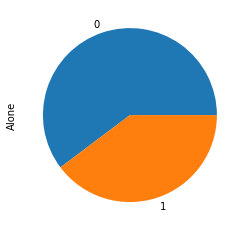

In [ ]:
df['Alone'].value_counts().plot(kind='pie')

### Строим сводную таблицу

In [ ]:
df.groupby('Sex')[['Survived']].mean() #начинаем с простого

Survived
Sex             
female  0.742038
male    0.188908

Сразу же можно сделать вывод о том, что из каждых четырех женщин, находившихся на борту, выжили три, в то время как из каждых пяти мужчин выжил только один!

Это интересная информация, но мы можем пойти дальше и выяснить взаимосвязь между показателем выживаемости и двумя другими параметрами, такими как пол и, например, класс. Используя терминологию GroupBy, мы могли бы сформулировать последовательность наших действий следующим образом: группируем по (group by) классу и полу, отбираем (select) выживших, применяем (apply) агрегацию по среднему, объединяем (combine) результирующие группы и преобразуем (unstack) иерархический индекс, чтобы раскрыть скрытую многомерность. Выразим это в коде:

In [ ]:
df.groupby(['Sex', 'Pclass'])['Survived'].agg('mean').unstack()

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

Теперь мы имеем четкое представление о том, как пол и класс повлияли на выживаемость, но код становится немного громоздким. Хотя каждый шаг этой последовательности вполне понятен в свете рассмотренных выше инструментов, тем не менее длинную строку кода достаточно трудно читать и использовать. Подобные операции широко распространены, в связи с чем библиотека Pandas имеет в своем составе специальный метод pivot_table, лаконично реализующий данный тип многомерной агрегации.

In [ ]:
df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean', margins=True)
df.pivot_table()

Pclass         1         2         3       All
Sex                                           
female  0.968085  0.921053  0.500000  0.742038
male    0.368852  0.157407  0.135447  0.188908
All     0.629630  0.472826  0.242363  0.383838

In [ ]:
age = pd.cut(df['Age'], [0, 18, 80])
df.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

### Join'ы

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering',
'HR']})

df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)
 

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [ ]:
df3 = pd.merge(df1, df2)
df3
#подробнее https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

### Дополнительные приемы работы с числами

In [ ]:
new_df = pd.DataFrame({'col1': [1,2,3,4,5], 'col2': '2,5 4,5 3.3 1,5 2,9'.split()})

new_df

col1 col2
0     1  2,5
1     2  4,5
2     3  3.3
3     4  1,5
4     5  2,9

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    5 non-null      int64 
 1   col2    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
new_df['col2'] = new_df['col2'].apply(lambda x: float(x.replace(',', '.')))


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5 non-null      int64  
 1   col2    5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 208.0 bytes


In [ ]:
new_df['col2'] = pd.to_numeric(new_df['col2'])

In [ ]:
new_df['col2'] = new_df['col2'].astype('float64')

In [ ]:
new_df['col2'] = new_df['col2'].apply(lambda x: float(x))

#### Если нужно заменить сразу много столбцов

In [ ]:
strNum = pd.DataFrame({'col1': '56,5 2,5 3.3 1,5 2,9'.split(), 'col2': '2,5 4,5 3.3 1,5 2,9'.split(), 
                       'col3': '7,6 4,5 3.3 7,5 1,9'.split()})
strNum

col1 col2 col3
0  56,5  2,5  7,6
1   2,5  4,5  4,5
2   3.3  3.3  3.3
3   1,5  1,5  7,5
4   2,9  2,9  1,9

In [ ]:
list(strNum)

['col1', 'col2', 'col3']

In [ ]:
for i in list(strNum):
    strNum[i] = strNum[i].apply(lambda x: float(x.replace(',', '.')))



### Работа с датами

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv')

df.head(10)

Date  Max_TemperatureC  Mean_TemperatureC  Min_TemperatureC
0   1/1/1948                10                8.0               7.0
1   1/2/1948                 6                4.0               3.0
2   1/3/1948                 7                4.0               2.0
3   1/4/1948                 7                4.0               2.0
4   1/5/1948                 7                3.0               0.0
5   1/6/1948                 9                7.0               5.0
6   1/7/1948                10                7.0               4.0
7   1/8/1948                 8                5.0               2.0
8   1/9/1948                 9                4.0               1.0
9  1/10/1948                 6                4.0               2.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24381 entries, 0 to 24380
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               24381 non-null  object 
 1   Max_TemperatureC   24381 non-null  int64  
 2   Mean_TemperatureC  24376 non-null  float64
 3   Min_TemperatureC   24380 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 762.0+ KB


In [4]:
df.isna().sum()

Date                 0
Max_TemperatureC     0
Mean_TemperatureC    5
Min_TemperatureC     1
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       1948-01-01
1       1948-01-02
2       1948-01-03
3       1948-01-04
4       1948-01-05
           ...    
24376   2015-12-27
24377   2015-12-28
24378   2015-12-29
24379   2015-12-30
24380   2015-12-31
Name: Date, Length: 24381, dtype: datetime64[ns]

In [6]:
df['Date'].dt.year

0        1948
1        1948
2        1948
3        1948
4        1948
         ... 
24376    2015
24377    2015
24378    2015
24379    2015
24380    2015
Name: Date, Length: 24381, dtype: int64

### Создание новых временнЫх признаков

In [ ]:
df['current_time'] = pd.to_datetime('today').strftime("%m/%d/%Y")



In [ ]:
df['current_time'] = pd.to_datetime(df['current_time'])

In [ ]:
df['timedelta'] = (df['current_time']-df['Date']).astype('timedelta64[Y]')
df

Date  Max_TemperatureC  Mean_TemperatureC  Min_TemperatureC  \
0     1948-01-01                10                8.0               7.0   
1     1948-01-02                 6                4.0               3.0   
2     1948-01-03                 7                4.0               2.0   
3     1948-01-04                 7                4.0               2.0   
4     1948-01-05                 7                3.0               0.0   
...          ...               ...                ...               ...   
24376 2015-12-27                 4                3.0               2.0   
24377 2015-12-28                 5                3.0               2.0   
24378 2015-12-29                 7                4.0               1.0   
24379 2015-12-30                 6                2.0              -1.0   
24380 2015-12-31                 6                2.0              -2.0   

      current_time  timedelta  
0       2020-04-26       72.0  
1       2020-04-26       72.0  
2       2020-04-26       72.0  
3       2020-04-26       72.0  
4       2020-04-26       72.0  
...            ...        ...  
24376   2020-04-26        4.0  
24377   2020-04-26        4.0  
24378   2020-04-26        4.0  
24379   2020-04-26        4.0  
24380   2020-04-26        4.0  

[24381 rows x 6 columns]

### Удаление дупликатов

In [ ]:
data = {"Name": ["James", "Alice", "Phil", "James"],
"Age": [24, 28, 40, 24],
"Sex": ["Male", "Female", "Male", "Male"]}

df = pd.DataFrame(data)
df


Name  Age     Sex
0  James   24    Male
1  Alice   28  Female
2   Phil   40    Male
3  James   24    Male

In [ ]:
df.drop_duplicates( )

Name  Age     Sex
0  James   24    Male
1  Alice   28  Female
2   Phil   40    Male

### Строковые методы очистки данных

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alnagaev/reni_land/master/test.csv')
df.head(10)

id Дата рождения  ...          Локация З/п в валюте найма
0   1    18.04.1994  ...  Санкт-Петербург       140 000,00 ₽
1   2    27.03.1993  ...           Москва       130 000,00 ₽
2   3    24.11.1983  ...  Санкт-Петербург       200 000,00 ₽
3   4    09.06.1989  ...           Москва       250 000,00 ₽
4   5    03.10.1978  ...  Санкт-Петербург       172 413,00 ₽
5   6    21.08.1973  ...  Санкт-Петербург       280 000,00 ₽
6   7    10.10.1991  ...           Москва       129 000,00 ₽
7   8    16.08.1982  ...           Москва       185 000,00 ₽
8   9    16.05.1988  ...  Санкт-Петербург       160 000,00 ₽
9  10    01.12.1990  ...   Краков; Польша        9 500,00 zł

[10 rows x 6 columns]

In [ ]:
df[df['Вакансия'].str.lower().str.contains('инженер')]

id Дата рождения  ...          Локация З/п в валюте найма
0    1    18.04.1994  ...  Санкт-Петербург       140 000,00 ₽
8    9    16.05.1988  ...  Санкт-Петербург       160 000,00 ₽
10  11    04.02.1991  ...           Москва       170 000,00 ₽
23  24    29.10.1987  ...  Санкт-Петербург       190 000,00 ₽

[4 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  58 non-null     int64 
 1   Дата рождения       58 non-null     object
 2   Вакансия            58 non-null     object
 3   Технология          58 non-null     object
 4   Локация             58 non-null     object
 5   З/п в валюте найма  58 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


Создание новых признаков

In [ ]:
df['salary'] = df['З/п в валюте найма'].apply(lambda x: int(''.join([s for s in list(x) if s.isdigit()]))/100)
df['currency'] = df['З/п в валюте найма'].apply(lambda x: ''.join([s for s in list(x) if not s.isdigit()]).replace(',', ''))
df.head(10)

id Дата рождения                           Вакансия Технология  \
0   1    18.04.1994    Инженер-программист 2 категории         JS   
1   2    27.03.1993  Разработчик информационных систем       .NET   
2   3    24.11.1983                     Java Developer       Java   
3   4    09.06.1989                      Архитектор ПО       Java   
4   5    03.10.1978             QA Automation Engineer         QA   
5   6    21.08.1973                 Big Data Developer   Big Data   
6   7    10.10.1991                       JS Developer         JS   
7   8    16.08.1982   Разработчик мобильных приложений    Android   
8   9    16.05.1988    Инженер-программист 2 категории       .NET   
9  10    01.12.1990                      Java Engineer       Java   

           Локация З/п в валюте найма    salary currency  
0  Санкт-Петербург       140 000,00 ₽  140000.0        ₽  
1           Москва       130 000,00 ₽  130000.0        ₽  
2  Санкт-Петербург       200 000,00 ₽  200000.0        ₽  
3           Москва       250 000,00 ₽  250000.0        ₽  
4  Санкт-Петербург       172 413,00 ₽  172413.0        ₽  
5  Санкт-Петербург       280 000,00 ₽  280000.0        ₽  
6           Москва       129 000,00 ₽  129000.0        ₽  
7           Москва       185 000,00 ₽  185000.0        ₽  
8  Санкт-Петербург       160 000,00 ₽  160000.0        ₽  
9   Краков; Польша        9 500,00 zł    9500.0       zł

**Приведем список технологий к единообразию на примере JS**

In [ ]:
df['Технология'] = df['Технология'].replace('JavaScript', 'JS')

In [ ]:
df[df["Технология"].isin(["JS", 'Java'])]

id Дата рождения                         Вакансия Технология  \
0    1    18.04.1994  Инженер-программист 2 категории         JS   
2    3    24.11.1983                   Java Developer       Java   
3    4    09.06.1989                    Архитектор ПО       Java   
6    7    10.10.1991                     JS Developer         JS   
9   10    01.12.1990                    Java Engineer       Java   
10  11    04.02.1991              Инженер-программист         JS   
12  13    04.11.1988              JavaScript Engineer         JS   
13  14    09.04.1990                Software Engineer         JS   
15  16    30.08.1982                   Java Developer       Java   
17  18    28.08.1995                     JS Developer         JS   
20  21    06.07.1990          Разработчик интерфейсов         JS   
23  24    29.10.1987              Инженер-программист         JS   
26  27    01.11.1991             Фронтенд разработчик         JS   
27  28    09.10.1990                   Java Developer       Java   
30  31    09.02.1992            Senior Java developer       Java   
32  33    26.09.1981                   Java Developer       Java   
37  38    03.04.1990              JavaScript Engineer         JS   
38  39    10.06.1988         Senior Software Engineer       Java   
45  46    25.10.1985            Senior Java developer       Java   
47  48    06.03.1989                           JS Dev         JS   
49  50    09.02.1985                   Java Developer       Java   
51  52    26.12.1987            Senior Java Developer       Java   
56  57    12.09.1986                         Java Dev       Java   
57  58    15.04.1989                           JS Dev         JS   

            Локация З/п в валюте найма     salary currency  
0   Санкт-Петербург       140 000,00 ₽  140000.00        ₽  
2   Санкт-Петербург       200 000,00 ₽  200000.00        ₽  
3            Москва       250 000,00 ₽  250000.00        ₽  
6            Москва       129 000,00 ₽  129000.00        ₽  
9    Краков; Польша        9 500,00 zł    9500.00       zł  
10           Москва       170 000,00 ₽  170000.00        ₽  
12   Краков; Польша       10 500,00 zł   10500.00       zł  
13  Вроцлав; Польша        9 500,00 zł    9500.00       zł  
15           Москва       180 000,00 ₽  180000.00        ₽  
17           Москва       160 000,00 ₽  160000.00        ₽  
20  Санкт-Петербург       113 000,00 ₽  113000.00        ₽  
23  Санкт-Петербург       190 000,00 ₽  190000.00        ₽  
26  Санкт-Петербург       300 000,00 ₽  300000.00        ₽  
27           Москва       170 000,00 ₽  170000.00        ₽  
30  Санкт-Петербург       264 367,82 ₽  264367.82        ₽  
32           Москва       210 000,00 ₽  210000.00        ₽  
37   Краков; Польша       13 000,00 zł   13000.00       zł  
38  София; Болгария        lev6 446,00    6446.00     lev   
45  Санкт-Петербург       252 900,00 ₽  252900.00        ₽  
47  Санкт-Петербург       200 000,00 ₽  200000.00        ₽  
49           Москва       300 000,00 ₽  300000.00        ₽  
51  Санкт-Петербург       210 000,00 ₽  210000.00        ₽  
56  Атлон; Ирландия         € 4 000,00    4000.00      €    
57  Атлон; Ирландия         € 2 980,00    2980.00      €

In [ ]:
df.query('Технология == "JS" | Технология == "Java"')

id Дата рождения                         Вакансия Технология  \
0    1    18.04.1994  Инженер-программист 2 категории         JS   
2    3    24.11.1983                   Java Developer       Java   
3    4    09.06.1989                    Архитектор ПО       Java   
6    7    10.10.1991                     JS Developer         JS   
9   10    01.12.1990                    Java Engineer       Java   
10  11    04.02.1991              Инженер-программист         JS   
12  13    04.11.1988              JavaScript Engineer         JS   
13  14    09.04.1990                Software Engineer         JS   
15  16    30.08.1982                   Java Developer       Java   
17  18    28.08.1995                     JS Developer         JS   
20  21    06.07.1990          Разработчик интерфейсов         JS   
23  24    29.10.1987              Инженер-программист         JS   
26  27    01.11.1991             Фронтенд разработчик         JS   
27  28    09.10.1990                   Java Developer       Java   
30  31    09.02.1992            Senior Java developer       Java   
32  33    26.09.1981                   Java Developer       Java   
37  38    03.04.1990              JavaScript Engineer         JS   
38  39    10.06.1988         Senior Software Engineer       Java   
45  46    25.10.1985            Senior Java developer       Java   
47  48    06.03.1989                           JS Dev         JS   
49  50    09.02.1985                   Java Developer       Java   
51  52    26.12.1987            Senior Java Developer       Java   
56  57    12.09.1986                         Java Dev       Java   
57  58    15.04.1989                           JS Dev         JS   

            Локация З/п в валюте найма     salary currency  
0   Санкт-Петербург       140 000,00 ₽  140000.00        ₽  
2   Санкт-Петербург       200 000,00 ₽  200000.00        ₽  
3            Москва       250 000,00 ₽  250000.00        ₽  
6            Москва       129 000,00 ₽  129000.00        ₽  
9    Краков; Польша        9 500,00 zł    9500.00       zł  
10           Москва       170 000,00 ₽  170000.00        ₽  
12   Краков; Польша       10 500,00 zł   10500.00       zł  
13  Вроцлав; Польша        9 500,00 zł    9500.00       zł  
15           Москва       180 000,00 ₽  180000.00        ₽  
17           Москва       160 000,00 ₽  160000.00        ₽  
20  Санкт-Петербург       113 000,00 ₽  113000.00        ₽  
23  Санкт-Петербург       190 000,00 ₽  190000.00        ₽  
26  Санкт-Петербург       300 000,00 ₽  300000.00        ₽  
27           Москва       170 000,00 ₽  170000.00        ₽  
30  Санкт-Петербург       264 367,82 ₽  264367.82        ₽  
32           Москва       210 000,00 ₽  210000.00        ₽  
37   Краков; Польша       13 000,00 zł   13000.00       zł  
38  София; Болгария        lev6 446,00    6446.00     lev   
45  Санкт-Петербург       252 900,00 ₽  252900.00        ₽  
47  Санкт-Петербург       200 000,00 ₽  200000.00        ₽  
49           Москва       300 000,00 ₽  300000.00        ₽  
51  Санкт-Петербург       210 000,00 ₽  210000.00        ₽  
56  Атлон; Ирландия         € 4 000,00    4000.00      €    
57  Атлон; Ирландия         € 2 980,00    2980.00      €

Метод **str.contains**

In [ ]:
df['Вакансия'].str.split(expand=True)



0               1           2               3           4
0   Инженер-программист               2   категории            None        None
1           Разработчик  информационных      систем            None        None
2                  Java       Developer        None            None        None
3            Архитектор              ПО        None            None        None
4                    QA      Automation    Engineer            None        None
5                   Big            Data   Developer            None        None
6                    JS       Developer        None            None        None
7           Разработчик       мобильных  приложений            None        None
8   Инженер-программист               2   категории            None        None
9                  Java        Engineer        None            None        None
10  Инженер-программист            None        None            None        None
11                 .NET        Engineer        None            None        None
12           JavaScript        Engineer        None            None        None
13             Software        Engineer        None            None        None
14                 Head              of    Software         Testing  Department
15                 Java       Developer        None            None        None
16                 Data               /         DWH         Analyst        None
17                   JS       Developer        None            None        None
18               Senior        Software    Engineer            None        None
19                   QA        Engineer        None            None        None
20          Разработчик     интерфейсов        None            None        None
21                   3D          Artist        None            None        None
22               Senior          Tester        None            None        None
23  Инженер-программист            None        None            None        None
24                  Big            Data   Developer            None        None
25          Разработчик  информационных      систем            None        None
26             Фронтенд     разработчик        None            None        None
27                 Java       Developer        None            None        None
28          Разработчик  информационных      систем            None        None
29                  Big            Data   Developer            None        None
30               Senior            Java   developer            None        None
31                 Game        Designer        None            None        None
32                 Java       Developer        None            None        None
33                  iOS       Developer        None            None        None
34                  iOS       Developer        None            None        None
35                   BI             Dev        None            None        None
36                  PHP             Dev        None            None        None
37           JavaScript        Engineer        None            None        None
38               Senior        Software    Engineer            None        None
39                 Test      Automation    Engineer            None        None
40           Специалист              по     продаже  консалтинговых       услуг
41              ASP.NET       Developer        None            None        None
42                  С++       Developer        None            None        None
43             Software       Developer        None            None        None
44                  С++       Developer        None            None        None
45               Senior            Java   developer            None        None
46             Solution       Architect        None            None        None
47                   JS             Dev        None            None        None
48                  PHP             Dev        None            None        None
49                 Jav

### Спасибо за внимание! Буду рад ответить на ваши вопросы

Форма ОС
https://forms.gle/XEC83zxNNMw8HMjr7